In [ ]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [9]:
##import dataset
df_census = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/relabeled_census.csv', encoding = "ISO-8859-1")
df_broadband_only = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/merged_broadband.csv', encoding = 'ISO-8859-1')
df_broadband = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/weighted_merged_all.csv', encoding = 'ISO-8859-1')

# Merged Datasets EDA



In [10]:
df_broadband.head()

,Zip,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD,median_age_overall,median_age_male,median_age_female,employment_rate,median_income,total_households,ave_household_size,ave_family_size,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_pop2,STATE,ZIP_TYPE,RUCA1,RUCA2
0,29639,3.0,0.0,8.0,3.0,3.0,5.0,3.0,163.0,93.12,223.75,90%,40.0,3.0,0.0,5.0,3.0,3.0,3.0,3.0,21.0,SC,Abbeville,0.948,0.034,0.110,0.002,37.550512,33.269798,43.424797,51.574744,52572.891752,1330.307664,2.768668,3.357934,4306.115164,95985.764786,76.589544,2.788520,16.042600,0.000000,1.791734,0.0,0.0,2.687602,43.985411,17.905249,19.582827,60.842972,68.689906,0.074843,68.615063,48.885741,14.920652,17.174151,5.031883,2.170438,0.375200,5.747541,25.562553,82.493936,0.074843,67.267894,15.151199,17.506064,88.950971,86.189438,100.0,4306.115164,SC,Zip Code Area,6.0,6.0
1,29620,6.0,0.0,11.0,5.0,3.0,7.0,3.0,2536.0,212.50,536.35,98%,40.0,6.0,0.0,8.0,3.0,3.0,3.0,3.0,542.0,SC,Abbeville,0.398,0.002,0.007,0.000,44.969110,43.936586,45.418218,52.052838,36943.842035,2164.599987,2.402883,3.061932,5274.299089,97735.103000,61.242744,1.427307,36.189646,0.130169,0.013777,0.0,0.0,0.985261,52.288194,19.620790,15.633804,53.774718,67.955913,0.000575,67.955338,57.786308,10.093722,8.476881,4.558935,0.418545,0.454245,4.705993,27.338094,80.712703,0.000575,65.819564,14.892564,19.287297,93.098385,81.591357,100.0,5274.299089,SC,Zip Code Area,4.0,4.0
2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,Abbeville,0.206,0.152,0.608,0.043,48.500000,48.400000,48.800000,46.100000,36942.000000,1397.000000,2.480000,2.910000,3464.000000,92900.000000,96.000000,0.300000,3.600000,0.000000,0.000000,0.0,0.0,0.000000,62.500000,16.863991,19.540230,54.727475,61.775233,0.000000,61.775233,51.825340,5.869721,7.659270,3.793844,0.000000,0.214746,12.956335,25.268432,85.254116,0.000000,61.775233,23.478883,14.745884,100.000000,83.900000,100.0,3464.000000,SC,Zip Code Area,2.0,2.0
3,29638,6.0,1.0,13.0,4.0,4.0,6.0,4.0,272.0,82.79,222.35,95%,40.0,5.0,0.0,7.0,2.0,2.0,2.0,2.0,68.0,SC,Abbeville,0.369,0.010,0.031,-0.001,41.227244,39.474290,43.531624,50.489605,46262.734368,1376.287278,2.576335,3.155941,3849.135001,90655.570400,78.012401,2.777750,16.005229,0.000000,0.928906,0.0,0.0,2.233967,45.636079,15.537107,15.963346,56.127742,71.838817,0.404128,71.434689,52.501313,16.697691,17.097642,4.840706,1.041495,0.156939,3.776371,24.384813,81.319740,0.404128,70.247521,10.668091,18.680260,93.406966,84.480742,100.0,3849.135001,SC,Zip Code Area,6.0,6.0
4,29628,4.0,0.0,8.0,3.0,2.0,5.0,2.0,100.0,51.12,126.06,95%,40.0,4.0,0.0,6.0,3.0,3.0,3.0,3.0,102.0,SC,Abbeville,0.221,0.014,0.043,0.000,42.128810,36.462735,47.271399,43.352088,27462.649657,1113.068894,2.464650,3.416300,2748.179543,63066.909567,52.588831,0.498695,42.456837,0.013048,0.000000,0.0,0.0,4.441284,51.716284,25.600064,8.811430,43.270335,70.473209,0.000000,70.473209,50.569821,17.360446,18.984496,3.245942,0.010795,0.442579,4.202075,25.324715,78.286085,0.000000,67.895454,10.390630,21.713915,97.927401,78.157411,1

In [11]:
# check is there any missing values in dataframe as a whole
df_broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32653 entries, 0 to 32652
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Zip                                       32653 non-null  int64  
 1   WiredCount_2020                           29408 non-null  float64
 2   Fwcount_2020                              29408 non-null  float64
 3   AllProviderCount_2020                     29408 non-null  float64
 4   Wired25_3_2020                            29408 non-null  float64
 5   Wired100_3_2020                           29408 non-null  float64
 6   All25_3_2020                              29408 non-null  float64
 7   All100_3                                  29408 non-null  float64
 8   TestCount                                 26115 non-null  float64
 9   AverageMbps                               26115 non-null  float64
 10  FastestAverageMbps                

## EDA - Missing Values


### 1.Broadband Merged Datasets

In [14]:
# Get the sum of missing values for each variable.
display(df_broadband.isnull().sum())

Zip                         0
WiredCount_2020          3245
Fwcount_2020             3245
AllProviderCount_2020    3245
Wired25_3_2020           3245
                         ... 
total_pop2                 11
STATE                      15
ZIP_TYPE                   15
RUCA1                      15
RUCA2                      15
Length: 73, dtype: int64

In [15]:
## To calculate the %of missing values for each variable
(
    ( 
        df_broadband.isna()    
       .sum(axis=0)     # count the number of na for each variable (now data is 1 obs per column = # missing)
        /len(df_broadband)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)[:13]
    .to_frame(name='% missing') 
    .style.format("{:.1f}")    
)


,% missing
TestCount,20.0
AverageMbps,20.0
FastestAverageMbps,20.0
Lowest Priced Terrestrial Broadband Plan,19.2
Total_Enrolled_Households,14.8
%Access to Terrestrial Broadband,9.9
WiredCount_2015,9.9
All100_3.1,9.9
All25_3_2015,9.9
Wired100_3_2015,9.9


In [16]:
df_broadband.describe()

## looking at pct_pop_bachelors+	pct_pop_hs+, the min max average etc. all look reasonable
## don't seem like there's mislabeling or something

,Zip,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD,median_age_overall,median_age_male,median_age_female,employment_rate,median_income,total_households,ave_household_size,ave_family_size,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_pop2,RUCA1,RUCA2
count,32653.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,2.611500e+04,26115.000000,26115.000000,26371.000000,29406.000000,29406.000000,29406.000000,29406.000000,29406.000000,29406.000000,29406.000000,27820.000000,32653.000000,32653.000000,32653.000000,32653.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,3.264200e+04,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32638.000000,32638.000000
mean,49866.485101,4.046280,1.795022,11.205250,2.916689,2.499592,5.524585,3.115683,1.165847e+04,54.393155,134.793806,55.309596,3.221043,0.997075,5.635789,1.672992,1.048255,1.772597,1.067673,309.435047,0.368895,0.032207,0.118934,0.004814,42.406450,41.387721,43.408586,56.166661,61827.512633,1693.545321,2.557388,3.086092,4497.850631,2.020124e+05,76.425625,9.646872,7.657499,1.753819,2.235073,0.107678,0.139231,2.031086,42.752335,13.614560,25.166213,59.986890,78.240019,0.597286,77.642733,59.675050,11.785082,14.695740,9.182034,2.066432,0.217271,3.246938,18.380699,86.890113,0.576109,76.941632,9.372373,12.977543,94.352333,87.647764,99.000236,4497.850631,4.315522,4.321812
std,27403.493856,2.092368,1.809475,3.321932,2.036260,1.950574,2.339530,2.182125,2.914038e+05,50.179648,128.602807,20.980244,1.832700,1.213254,2.338119,1.277718,1.037546,1.339629,1.056592,639.152648,0.324585,0.046370,0.193151,0.010466,6.618908,6.833826,6.794769,9.844336,24669.079985,732.958107,0.369973,0.379612,2121.807668,1.756687e+05,24.072729,15.357901,14.802168,8.683234,5.319570,0.945128,0.394792,2.041185,13.687139,8.392302,14.790334,12.809202,10.559397,0.751254,10.651325,12.219352,6.120149,6.040588,6.061143,2.425983,0.456864,2.670227,9.642037,7.710745,0.741055,10.815545,5.070274,7.304863,6.589138,8.300279,5.467268,2121.807668,3.560467,3.566864
min,1001.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,19.950000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000,-0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.532010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.

### Univariate Exploration

#### 1.1 Education

##### Percent of population with a college degree

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


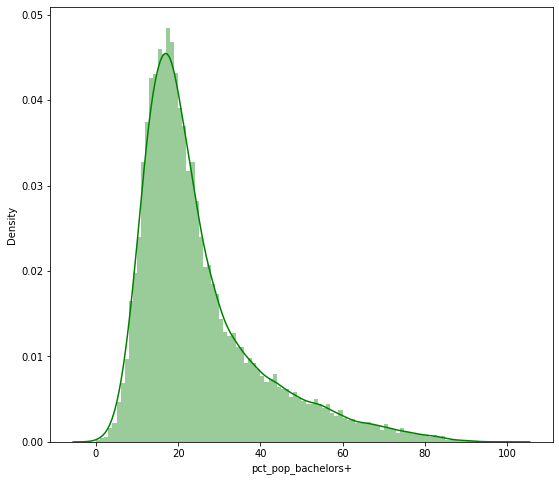

In [17]:
plt.figure(figsize=(9, 8))
sns.distplot(df_broadband['pct_pop_bachelors+'], color='g', bins=100, hist_kws={'alpha': 0.4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


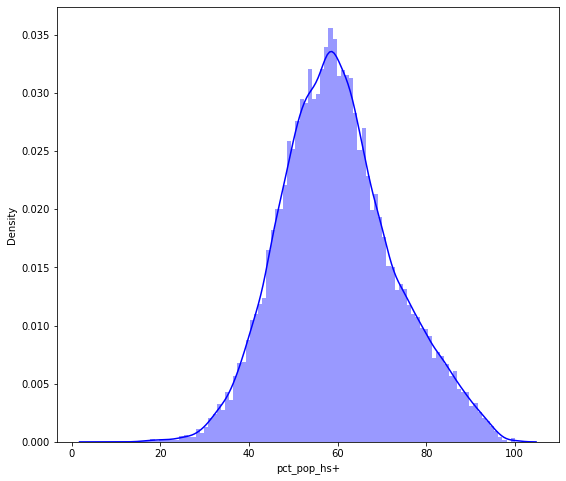

In [23]:
plt.figure(figsize=(9, 8))
sns.distplot(df_broadband['pct_pop_hs+'], color='b', bins=100, hist_kws={'alpha': 0.4});

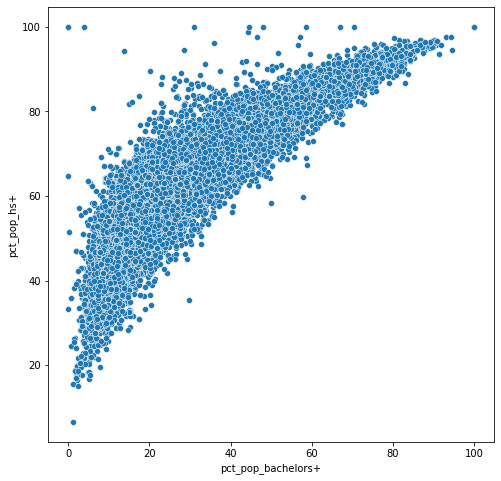

In [26]:
# explore relationship between pct with high shcool vs. pct with bachelors degree
plt.figure(figsize = (8,8))
sns.scatterplot(data=df_broadband, x="pct_pop_bachelors+", y="pct_pop_hs+")

## we can see that the positive relationship makes sense since areas with higher %of high school degree are
## likely to have higher % of college degree

In [40]:
df_broadband_1=df_broadband[['pct_pop_bachelors+','pct_pop_hs+','ST']]

df_broadband_1.groupby(['ST']).mean()


,pct_pop_bachelors+,pct_pop_hs+
ST,,
AK,18.669833,53.165797
AL,18.993292,54.387263
AR,16.521233,52.355920
AZ,24.019755,63.206258
CA,31.748799,65.567691
CO,34.068226,70.589320
CT,40.563253,69.116791
DC,64.588069,80.307372
DE,31.395947,62.418315


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


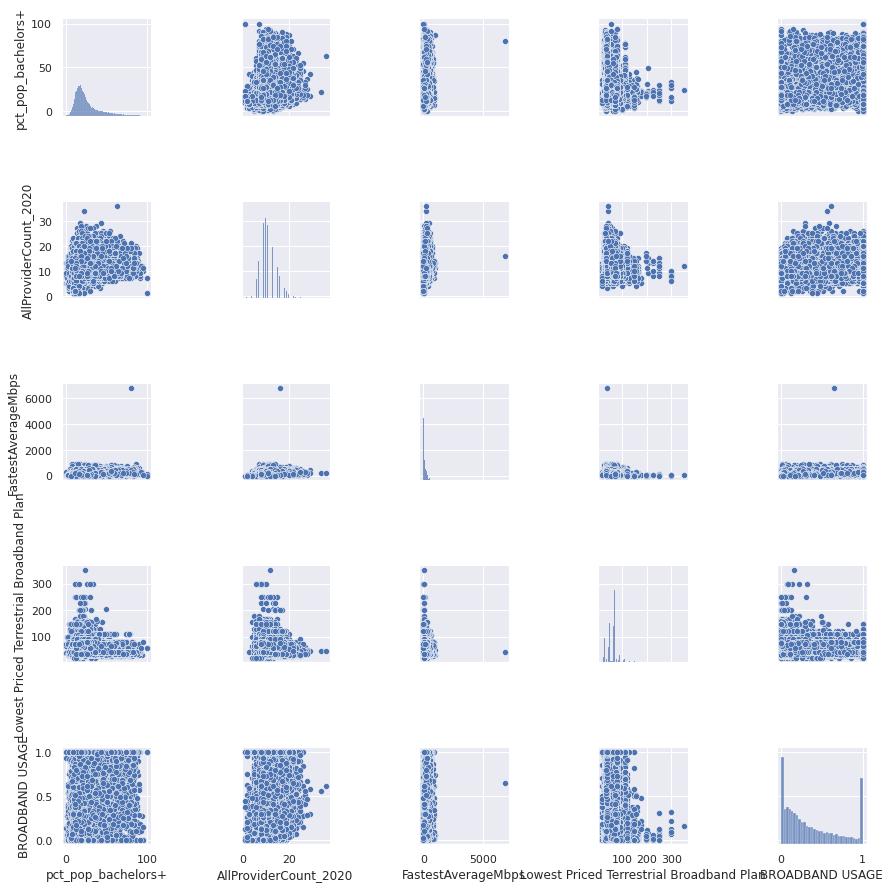

In [42]:
sns.set()
cols = ['pct_pop_bachelors+', 'AllProviderCount_2020','FastestAverageMbps',
        'Lowest Priced Terrestrial Broadband Plan','BROADBAND USAGE']
sns.pairplot(df_broadband[cols], size = 2.5)
plt.show()

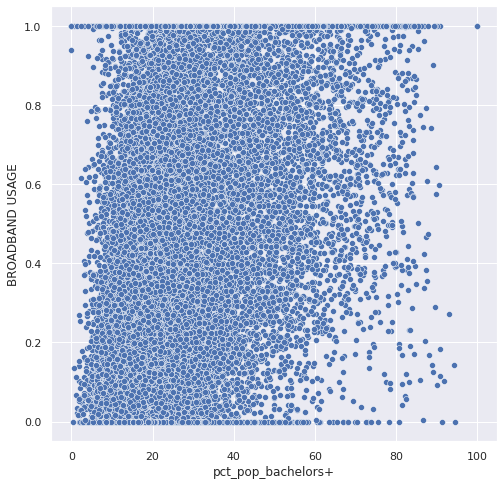

In [43]:
# explore relationship between pct with high shcool vs. pct with bachelors degree
plt.figure(figsize = (8,8))
sns.scatterplot(data=df_broadband, x="pct_pop_bachelors+", y="BROADBAND USAGE")

## we can see that the positive relationship makes sense since areas with higher %of high school degree are
## likely to have higher % of college degree

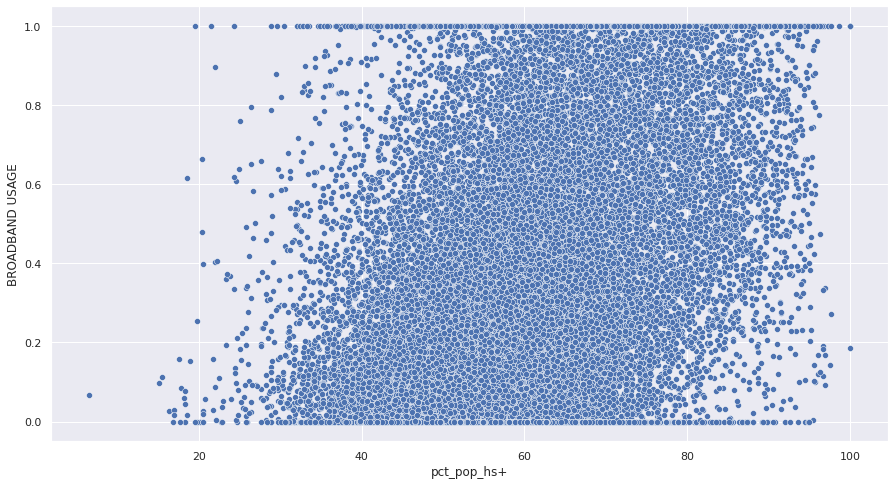

In [45]:
# explore relationship between pct with high shcool vs. pct with bachelors degree
plt.figure(figsize = (15,8))
sns.scatterplot(data=df_broadband, x="pct_pop_hs+", y="BROADBAND USAGE")

## we can see that the positive relationship makes sense since areas with higher %of high school degree are
## likely to have higher % of college degree

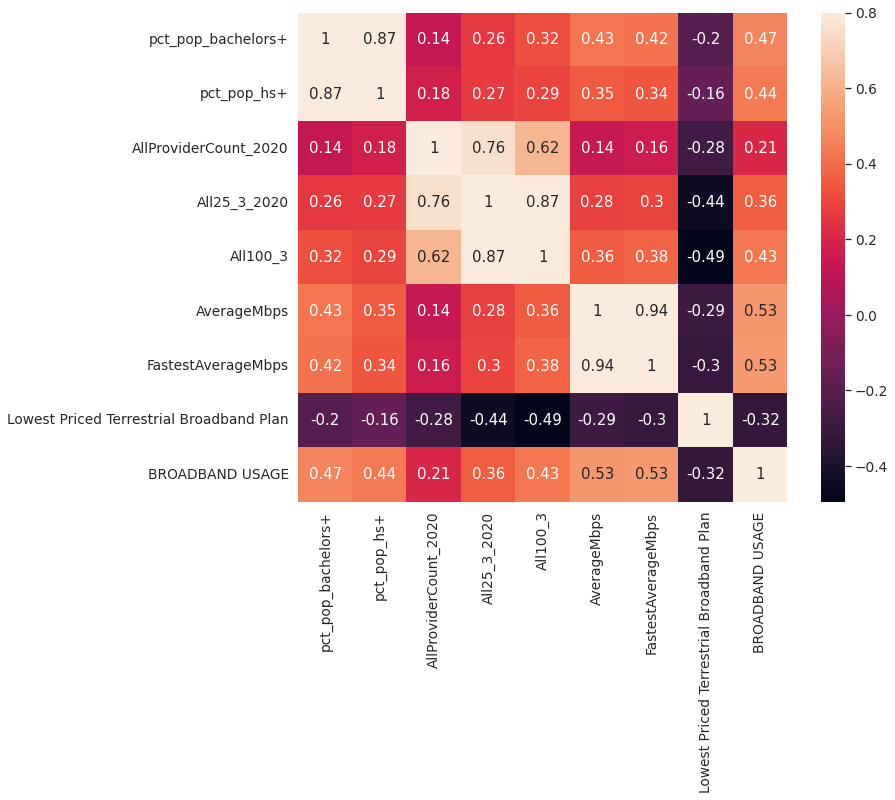

In [52]:
#correlation matrix

cols = ['pct_pop_bachelors+','pct_pop_hs+',  'AllProviderCount_2020','All25_3_2020', 'All100_3',
        'AverageMbps','FastestAverageMbps',
        'Lowest Priced Terrestrial Broadband Plan','BROADBAND USAGE']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

In [53]:
## get a list of numerical feature
numeric_feats = df_broadband.dtypes[df_broadband.dtypes != "object"].index
numeric_feats

Index(['Zip', 'WiredCount_2020', 'Fwcount_2020', 'AllProviderCount_2020',
       'Wired25_3_2020', 'Wired100_3_2020', 'All25_3_2020', 'All100_3',
       'TestCount', 'AverageMbps', 'FastestAverageMbps',
       'Lowest Priced Terrestrial Broadband Plan', 'WiredCount_2015',
       'Fwcount_2015', 'AllProviderCount_2015', 'Wired25_3_2015',
       'Wired100_3_2015', 'All25_3_2015', 'All100_3.1',
       'Total_Enrolled_Households', 'BROADBAND USAGE',
       'ERROR RANGE (MAE)(+/-)', 'ERROR RANGE (95%)(+/-)', 'MSD',
       'median_age_overall', 'median_age_male', 'median_age_female',
       'employment_rate', 'median_income', 'total_households',
       'ave_household_size', 'ave_family_size', 'total_population',
       'median_house_value', 'pct_white', 'pct_hisp_latino', 'pct_black',
       'pct_native', 'pct_asian', 'pct_hi_pi', 'pct_other_race',
       'pct_two+_race', 'pct_rent_burdened', 'poverty_rate',
       'pct_pop_bachelors+', 'pct_pop_hs+', 'pct_internet',
       'pct_internet_dia

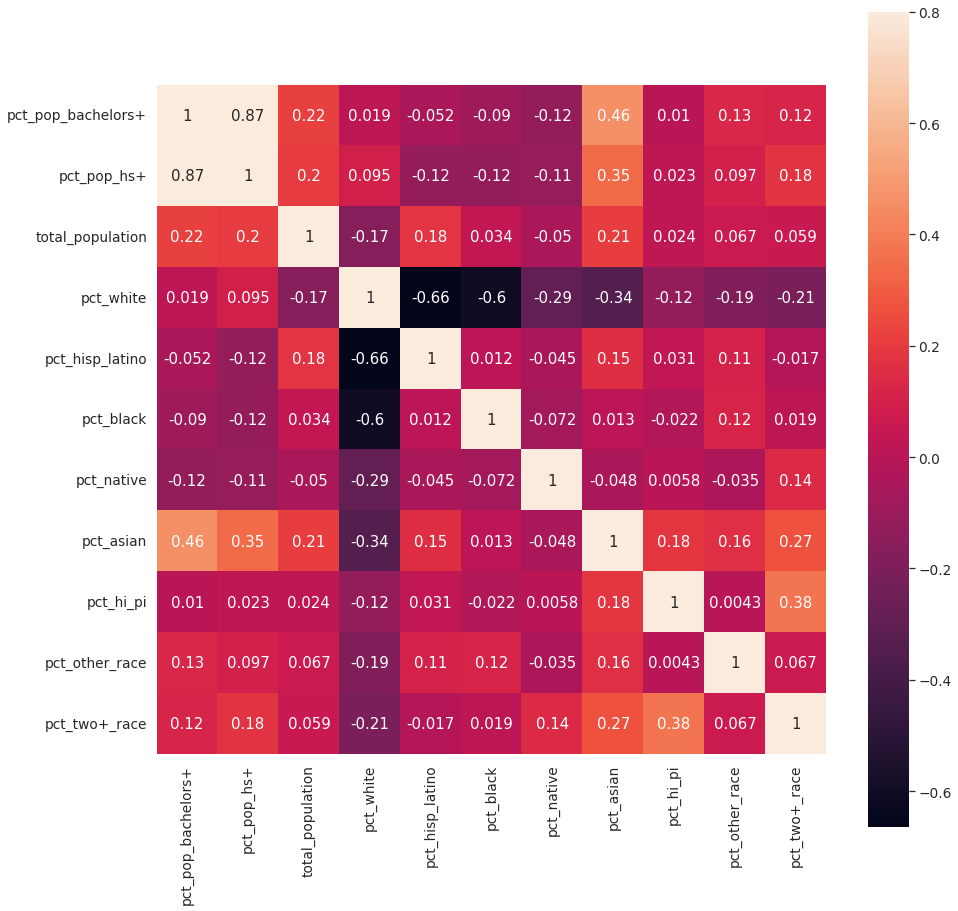

In [64]:
#correlation matrix for census ethnicity variables

cols = ['pct_pop_bachelors+','pct_pop_hs+',  'total_population',
       'pct_white', 'pct_hisp_latino', 'pct_black',
       'pct_native', 'pct_asian', 'pct_hi_pi', 'pct_other_race',
       'pct_two+_race', ]

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

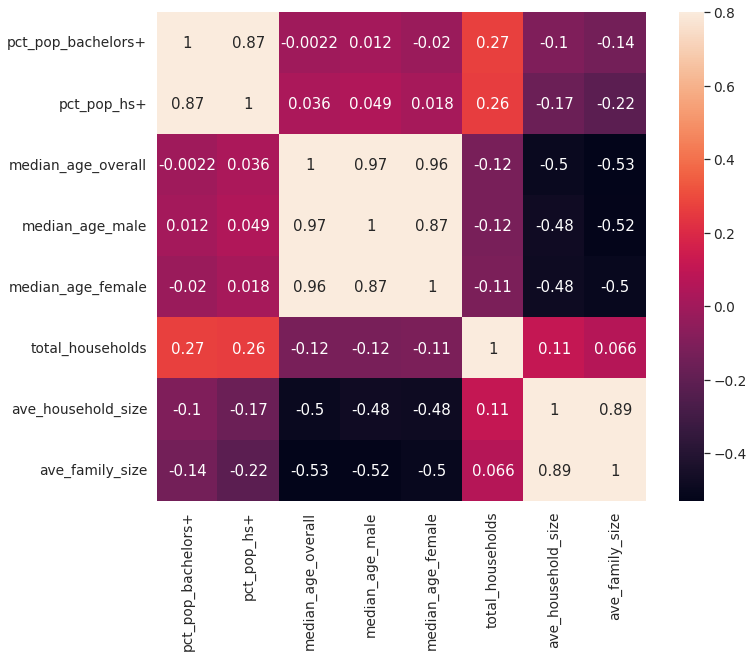

In [57]:
#correlation matrix for census ethnicity variables

cols = ['pct_pop_bachelors+','pct_pop_hs+', 
        'median_age_overall', 'median_age_male', 'median_age_female','total_households',
       'ave_household_size', 'ave_family_size']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

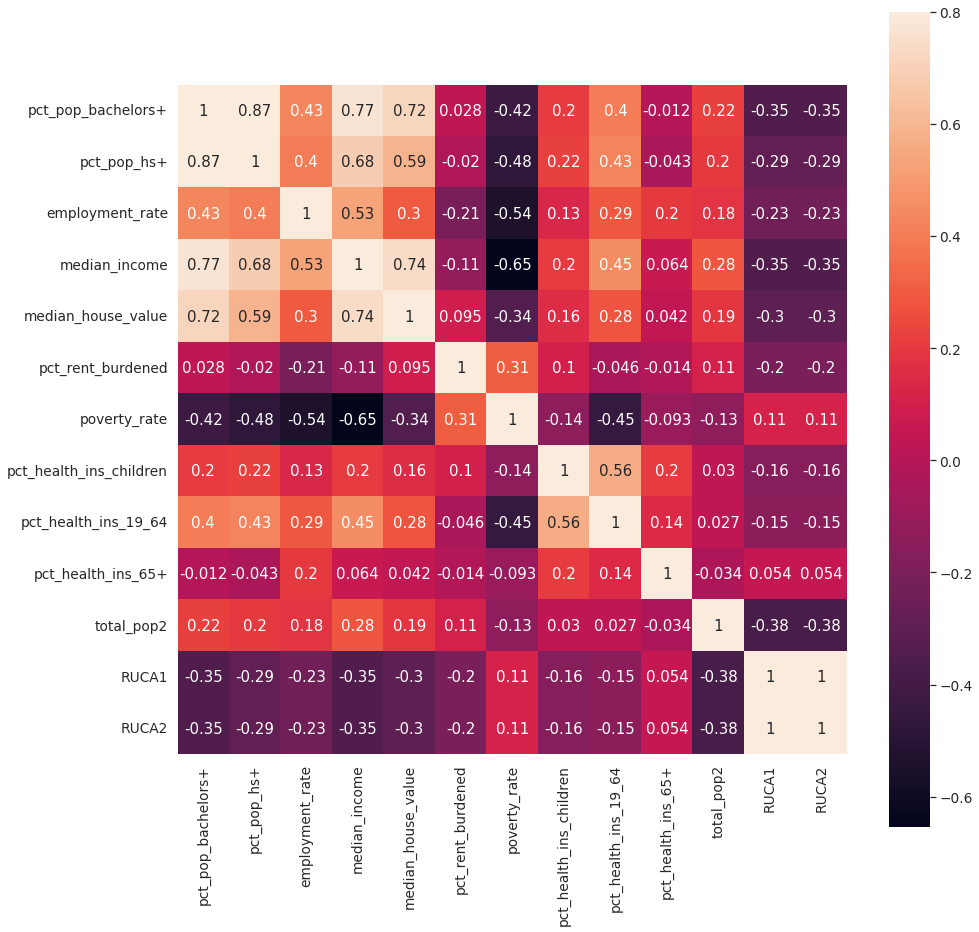

In [63]:
#correlation matrix for census ethnicity variables

cols = ['pct_pop_bachelors+','pct_pop_hs+', 
               'employment_rate', 'median_income', 
       'median_house_value', 'pct_rent_burdened', 'poverty_rate',
       'pct_health_ins_children', 'pct_health_ins_19_64', 'pct_health_ins_65+',
       'total_pop2', 'RUCA1', 'RUCA2']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()

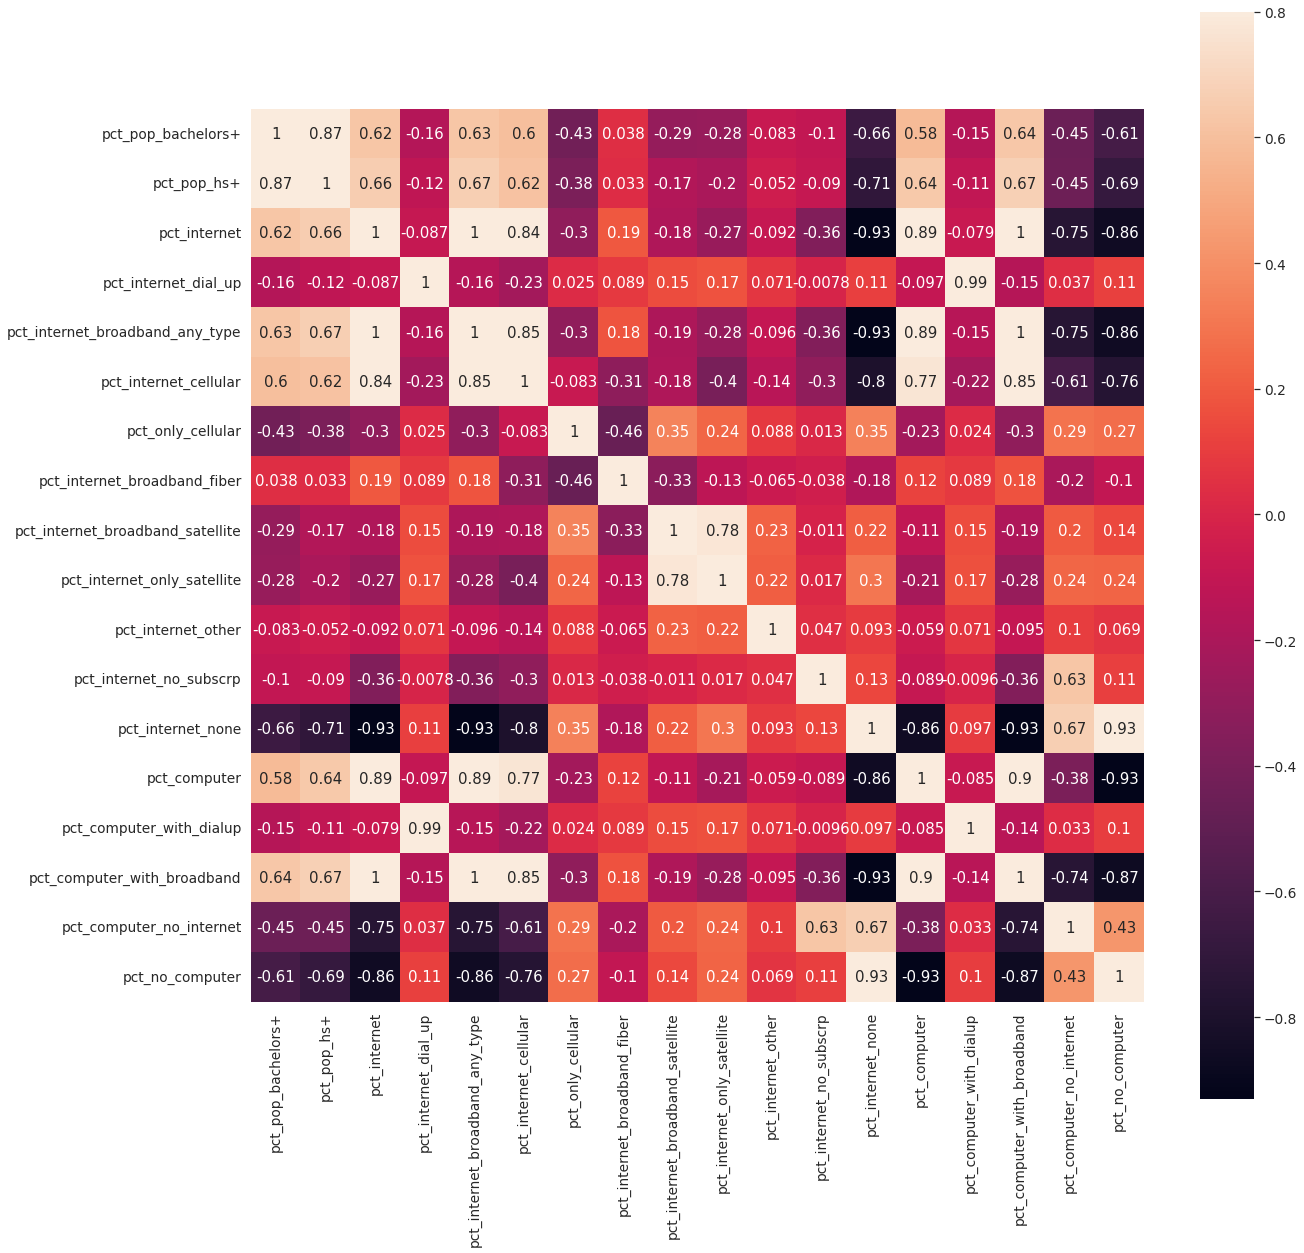

In [61]:
#correlation matrix for census - internet related variables

cols = ['pct_pop_bachelors+','pct_pop_hs+', 
              'pct_internet',
       'pct_internet_dial_up', 'pct_internet_broadband_any_type',
       'pct_internet_cellular', 'pct_only_cellular',
       'pct_internet_broadband_fiber', 'pct_internet_broadband_satellite',
       'pct_internet_only_satellite', 'pct_internet_other',
       'pct_internet_no_subscrp', 'pct_internet_none', 'pct_computer',
       'pct_computer_with_dialup', 'pct_computer_with_broadband',
       'pct_computer_no_internet', 'pct_no_computer']

corrmat = df_broadband[cols].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
plt.show()